In [1]:
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF
import os
import warnings
import os, sys
import numpy as np
import keras
import cv2
import random
from skimage import io,transform
from tflearn.layers.conv import global_avg_pool
from keras.models import Model
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.models import Model
from keras import layers
from keras import backend as K
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.callbacks import Callback

C:\Users\s110024\AppData\Local\conda\conda\envs\ML2018\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Use the retry module or similar alternatives.
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
def VGG16(input_tensor=None, input_shape=None):

    img_input = Input(shape=input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)


    # Classification block
    x = Flatten(name='flatten')(x)
    #x = Dense(4096, activation='relu', name='fca')(x)
    #x = Dense(4096, activation='relu', name='fcb')(x)
    x = Dense(40, activation='softmax', name='Classification')(x)

    inputs = img_input
    # Create model.
    model = Model(inputs, x, name='vgg16')

    return model

In [3]:
def loading(dirs = os.getcwd()):

    trainMatrix = []
    trainLabel = []
    testMatrix = []
    testLabel = []
    countOfPeople = 0
    for i in range(1, 40):
        if i == 14:
            continue
        file = os.path.join(dirs, 'CroppedYale', 'yaleB%02d' % i, '*.pgm')
    
        rawImg = io.imread_collection(file)
        
        imgs = np.array([cv2.resize(img, (224,224), interpolation = cv2.INTER_CUBIC) for img in rawImg])
        imgs = np.array(imgs, dtype=np.int64)
        
        countOfPeople = len(imgs)
        
        train = imgs[0:35]
        trainMatrix.append(train)
        for j in range(0, 35): trainLabel.append(i)
            
        test = imgs[countOfPeople-30:countOfPeople]
        testMatrix.append(test)
        for j in range(0, 30): testLabel.append(i) 

        
    return trainMatrix, trainLabel, testMatrix, testLabel

In [4]:
trainMatrix, trainLabel, testMatrix, testLabel = loading(os.getcwd())


trainCount = np.size(trainLabel, 0)
testCount = np.size(testLabel, 0)


trainMatrix = np.array(trainMatrix).reshape(trainCount,224,224,1)

testMatrix = np.array(testMatrix).reshape(testCount,224,224,1)


print("TrainCount: %d" % trainCount)
print("TestCount: %d\n" % testCount)

TrainCount: 1330
TestCount: 1140



In [5]:
trainLabel_encode = np_utils.to_categorical(trainLabel, num_classes=40)
testLabel_encode = np_utils.to_categorical(testLabel, num_classes=40)


In [6]:
model = VGG16(input_shape=[224, 224, 1])
sgd = SGD(lr=0.0001, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = model.fit(trainMatrix, trainLabel_encode, epochs=100, batch_size=32, 
                    validation_data=(testMatrix, testLabel_encode), verbose=1)

Train on 1330 samples, validate on 1140 samples
Epoch 1/100
1330/1330 [==============================] - 62s 47ms/step - loss: 3.7055 - acc: 0.0278 - val_loss: 3.7046 - val_acc: 0.0246
Epoch 2/100
1330/1330 [==============================] - 47s 35ms/step - loss: 3.6715 - acc: 0.0301 - val_loss: 3.6900 - val_acc: 0.0263
Epoch 3/100
1330/1330 [==============================] - 47s 35ms/step - loss: 3.6515 - acc: 0.0301 - val_loss: 3.6803 - val_acc: 0.0272
Epoch 4/100
1330/1330 [==============================] - 47s 35ms/step - loss: 3.6361 - acc: 0.0383 - val_loss: 3.6727 - val_acc: 0.0263
Epoch 5/100
1330/1330 [==============================] - 47s 35ms/step - loss: 3.6222 - acc: 0.0383 - val_loss: 3.6661 - val_acc: 0.0254
Epoch 6/100
1330/1330 [==============================] - 47s 35ms/step - loss: 3.6086 - acc: 0.0406 - val_loss: 3.6603 - val_acc: 0.0254
Epoch 7/100
1330/1330 [==============================] - 47s 36ms/step - loss: 3.5948 - acc: 0.0414 - val_loss: 3.6548 - val_acc: 

1330/1330 [==============================] - 47s 35ms/step - loss: 0.0496 - acc: 0.9925 - val_loss: 7.1919 - val_acc: 0.3298
Epoch 61/100
1330/1330 [==============================] - 47s 35ms/step - loss: 0.0480 - acc: 0.9925 - val_loss: 7.1898 - val_acc: 0.3316
Epoch 62/100
1330/1330 [==============================] - 47s 35ms/step - loss: 0.0463 - acc: 0.9932 - val_loss: 7.2402 - val_acc: 0.3272
Epoch 63/100
1330/1330 [==============================] - 47s 35ms/step - loss: 0.0451 - acc: 0.9932 - val_loss: 7.3631 - val_acc: 0.3237
Epoch 64/100
1330/1330 [==============================] - 47s 35ms/step - loss: 0.0438 - acc: 0.9932 - val_loss: 7.4132 - val_acc: 0.3219
Epoch 65/100
1330/1330 [==============================] - 47s 36ms/step - loss: 0.0424 - acc: 0.9932 - val_loss: 7.5408 - val_acc: 0.3158
Epoch 66/100
1330/1330 [==============================] - 47s 35ms/step - loss: 0.0418 - acc: 0.9932 - val_loss: 7.4535 - val_acc: 0.3211
Epoch 67/100
1330/1330 [=======================

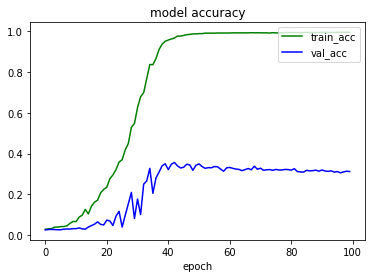

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], 'g', label='train_acc')
plt.plot(history.history['val_acc'], 'b', label='val_acc')
plt.legend(loc='upper right')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.show()

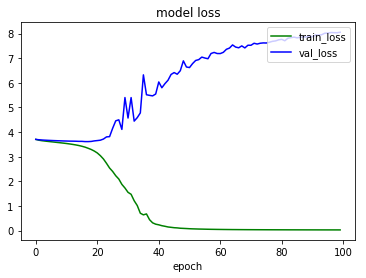

In [8]:
plt.plot(history.history['loss'], 'g', label='train_loss')
plt.plot(history.history['val_loss'], 'b', label='val_loss')
plt.legend(loc='upper right')
plt.title('model loss')
plt.xlabel('epoch')
plt.show()

In [9]:
loss, acc = model.evaluate(x = testMatrix, y = testLabel_encode, batch_size = 32)
print("loss : ", loss)
print("accuracy : ", acc)

1140/1140 [==============================] - 11s 9ms/step
loss :  8.055809844167609
accuracy :  0.311403508785001
